# Import Dependencies for Logistic Regression Analysis and Data Preprocessing

In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pickle
from sklearn.model_selection import train_test_split

# Load and Preview Titanic Training Dataset

In [83]:
data = pd.read_csv('Titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Explore and Clean Titanic Dataset: (EDA)

In [3]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

The distribution of the SibSp feature, which represents the number of siblings or spouses aboard. The majority of passengers had 0 siblings/spouses, followed by 1 sibling/spouse. Fewer passengers had 2, 3, 4, 5, or 8 siblings/spouses. So, i remove this column

In [4]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

The distribution of the Parch feature, indicating the number of parents or children aboard. Most passengers had 0 parents/children, with 1 parent/child being the next most common. Fewer passengers had 2, 3, 4, 5, or 6 parents/children. So, i remove this column

In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.drop_duplicates(inplace=True) # Drop duplicate rows

In [9]:
len(data['Ticket'].unique()) # This column is not helpful from a prediction standpoint.

681

In [10]:
data.drop(columns=['PassengerId','Cabin','Ticket','Name',"SibSp","Parch"],inplace=True) # deop columns which are not helpful in prediction

In [11]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


# Missing Values Handling

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 41.9+ KB


In [13]:
data[data['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked
61,1,1,female,38.0,80.0,NaN
829,1,1,female,62.0,80.0,NaN


In [14]:
data[data['Fare'] >= 80]

,Survived,Pclass,Sex,Age,Fare,Embarked
27,0,1,male,19.0,263.0000,S
31,1,1,female,NaN,146.5208,C
34,0,1,male,28.0,82.1708,C
61,1,1,female,38.0,80.0000,NaN
62,0,1,male,45.0,83.4750,S
...,...,...,...,...,...,...
829,1,1,female,62.0,80.0000,NaN
835,1,1,female,39.0,83.1583,C
849,1,1,female,NaN,89.1042,C
856,1,1,female,45.0,164.8667,S


Fills missing values in the Embarked column by propagating the next valid value backward.

In [15]:
data['Embarked'] = data['Embarked'].bfill()

In [16]:
data[data['Age'].isnull()]

,Survived,Pclass,Sex,Age,Fare,Embarked
5,0,3,male,NaN,8.4583,Q
17,1,2,male,NaN,13.0000,S
19,1,3,female,NaN,7.2250,C
26,0,3,male,NaN,7.2250,C
28,1,3,female,NaN,7.8792,Q
...,...,...,...,...,...,...
859,0,3,male,NaN,7.2292,C
863,0,3,female,NaN,69.5500,S
868,0,3,male,NaN,9.5000,S
878,0,3,male,NaN,7.8958,S


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

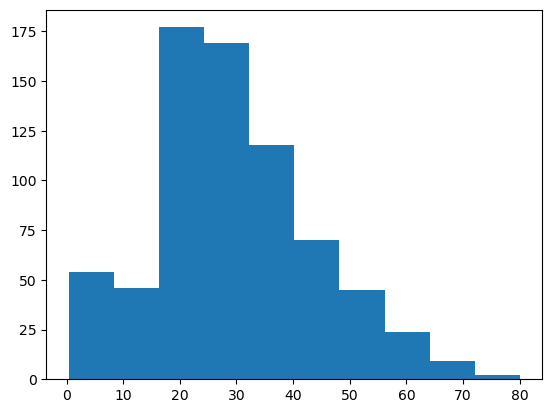

In [17]:
plt.hist(data['Age'])

<Axes: xlabel='Survived', ylabel='Age'>

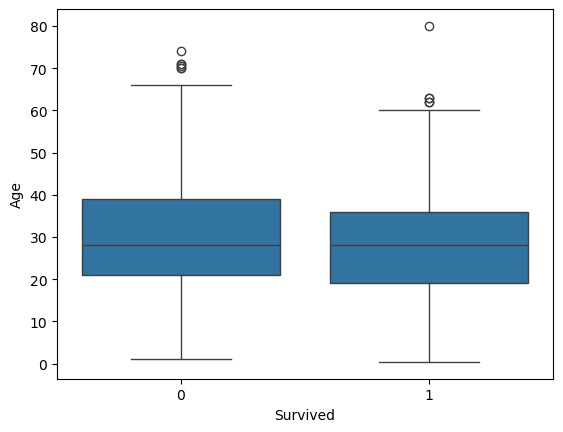

In [18]:
sns.boxplot(x=data['Survived'],y=data['Age'])

In [19]:
data.dropna(inplace=True)

# Data Type Optimization

In [20]:
data['Survived'] = data['Survived'].astype('int8')
data['Pclass'] = data['Pclass'].astype('int8')
data['Age'] = data['Age'].astype('int8')
data['Fare'] = data['Fare'].astype('int32')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  714 non-null    int8  
 1   Pclass    714 non-null    int8  
 2   Sex       714 non-null    object
 3   Age       714 non-null    int8  
 4   Fare      714 non-null    int32 
 5   Embarked  714 non-null    object
dtypes: int32(1), int8(3), object(2)
memory usage: 21.6+ KB


# Visualizations and Insights

In [22]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22,7,S
1,1,1,female,38,71,C
2,1,3,female,26,7,S
3,1,1,female,35,53,S
4,0,3,male,35,8,S


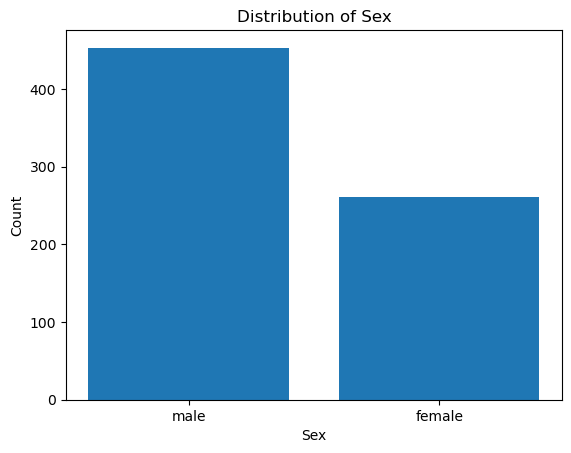

In [23]:
plt.bar(data['Sex'].value_counts().index, data['Sex'].value_counts().values)

plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')

plt.show()


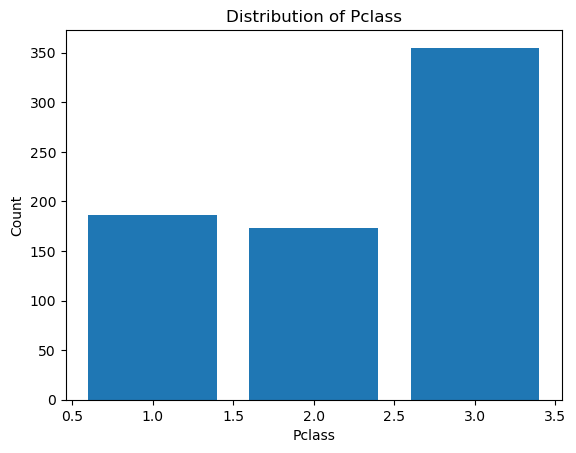

In [24]:
plt.bar(data['Pclass'].value_counts().index,data['Pclass'].value_counts().values)
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Distribution of Pclass')
plt.show()

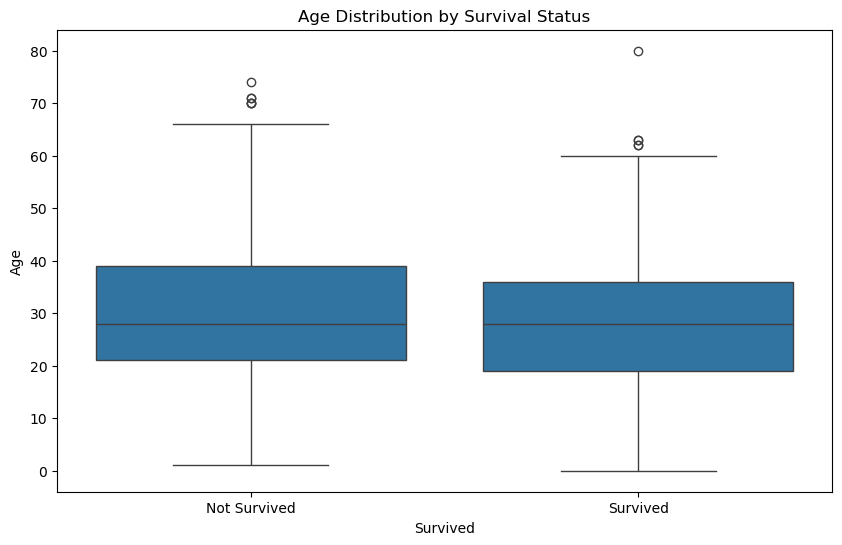

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=data)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

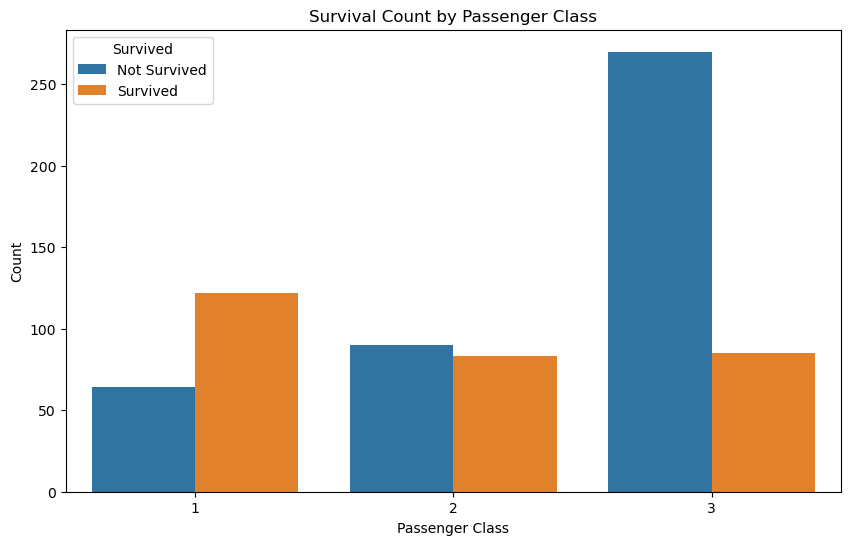

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

# Label Encoding for Categorical Data

In [27]:
label = LabelEncoder()
data['Sex'] = label.fit_transform(data['Sex'])
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22,7,S
1,1,1,0,38,71,C
2,1,3,0,26,7,S
3,1,1,0,35,53,S
4,0,3,1,35,8,S


# One-Hot Encoding for Categorical Data

In [28]:
data = pd.get_dummies(data,columns=['Embarked']) 
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22,7,False,False,True
1,1,1,0,38,71,True,False,False
2,1,3,0,26,7,False,False,True
3,1,1,0,35,53,False,False,True
4,0,3,1,35,8,False,False,True


In [29]:
data['Embarked_C'] = data['Embarked_C'].astype('int8')
data['Embarked_Q'] = data['Embarked_Q'].astype('int8')
data['Embarked_S'] = data['Embarked_S'].astype('int8')

In [30]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22,7,0,0,1
1,1,1,0,38,71,1,0,0
2,1,3,0,26,7,0,0,1
3,1,1,0,35,53,0,0,1
4,0,3,1,35,8,0,0,1


# Feature Scaling and Preparation Training data

In [53]:
X = data.drop(columns='Survived')
y =  data['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [56]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Implementation

## Function to Train a Logistic Regression Model

In [57]:
def logistic_regression(X_train,y_train, **kwargs):
    model = LogisticRegression(**kwargs)
    y_train = y_train.ravel()
    model.fit(X_train, y_train)
    return model

In [58]:
model = logistic_regression(X_train, y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8592\2491486511.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()


In [59]:
y_predictions = model.predict(X_test)

In [60]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79        87
           1       0.67      0.66      0.67        56

    accuracy                           0.74       143
   macro avg       0.73      0.73      0.73       143
weighted avg       0.74      0.74      0.74       143



In [61]:
cm = confusion_matrix(y_test,y_predictions)
cm

array([[69, 18],
       [19, 37]], dtype=int64)

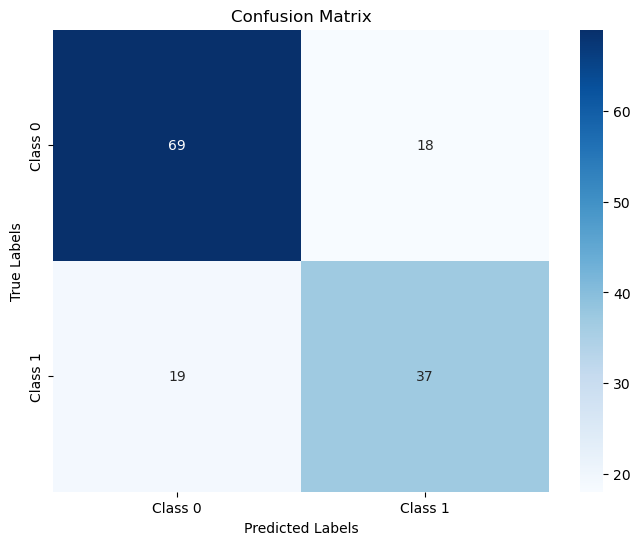

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
y_prob = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_predictions)
precision = precision_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

Accuracy: 0.7413
Precision: 0.6727
Recall: 0.6607
F1 Score: 0.6667
ROC-AUC Score: 0.8136


# Balancing Training Data with SMOTE

In [64]:
smote = SMOTE()  
X_train, y_train = smote.fit_resample(X_train, y_train)

The code initializes SMOTE to balance the training data.

In [77]:
model = logistic_regression(X_train, y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8592\2491486511.py:3: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y_train = y_train.ravel()


In [78]:
y_predictions = model.predict(X_test)

In [79]:
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        87
           1       0.67      0.75      0.71        56

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.76      0.76      0.76       143



In [80]:
cm = confusion_matrix(y_test,y_predictions)
cm

array([[66, 21],
       [14, 42]], dtype=int64)

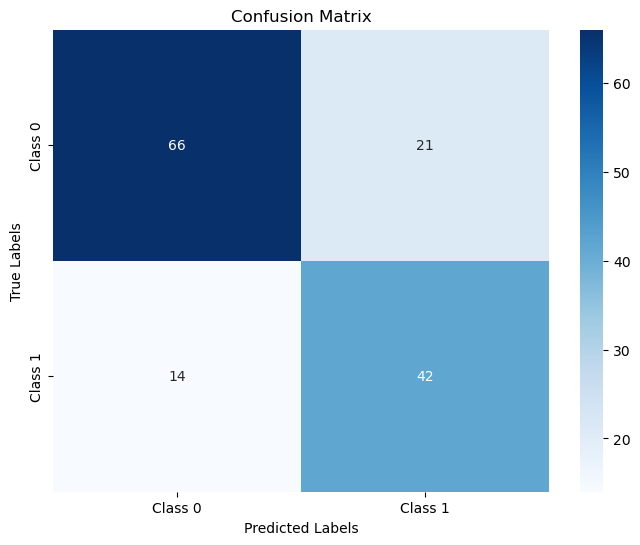

In [81]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [70]:
y_prob = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_predictions)
precision = precision_score(y_test, y_predictions)
recall = recall_score(y_test, y_predictions)
f1 = f1_score(y_test, y_predictions)
roc_auc = roc_auc_score(y_test, y_prob)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

Accuracy: 0.7552
Precision: 0.6667
Recall: 0.7500
F1 Score: 0.7059
ROC-AUC Score: 0.8116


# Adjust the Threshold of the Predictions

In [71]:
y_prob = model.predict_proba(X_test)[:, 1]

In [72]:
y_prob

array([0.18810156, 0.60040464, 0.84800826, 0.9787275 , 0.0577972 ,
       0.53302471, 0.56296105, 0.62720648, 0.62461388, 0.67919467,
       0.97160215, 0.83188664, 0.56917013, 0.07227397, 0.92150326,
       0.36743906, 0.23622532, 0.98575375, 0.32306782, 0.91700548,
       0.73375043, 0.66980563, 0.88751289, 0.47085505, 0.14366432,
       0.17618648, 0.18300654, 0.11934418, 0.86135339, 0.07214755,
       0.69902458, 0.79796616, 0.52399827, 0.08258472, 0.07557171,
       0.52619533, 0.24946046, 0.44314853, 0.24571171, 0.03997908,
       0.23512179, 0.15642777, 0.92402639, 0.11481977, 0.31544061,
       0.85185887, 0.81257778, 0.68900753, 0.4881052 , 0.93872506,
       0.49923505, 0.87915892, 0.61744788, 0.10921477, 0.12719998,
       0.59874643, 0.60870512, 0.28673476, 0.12194652, 0.0816369 ,
       0.83421386, 0.09453869, 0.72075321, 0.17618648, 0.413718  ,
       0.39364534, 0.2650312 , 0.96427452, 0.0984098 , 0.56960255,
       0.17618648, 0.87839103, 0.17992352, 0.26438724, 0.05276

In [73]:
y_predictions = (y_prob >= 0.55).astype(int)

In [74]:
with open('titanic_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# What is the difference between precision and recall?
**Precision** and **Recall** are two key metrics used to evaluate the performance of classification models, particularly in situations with imbalanced classes.

### Precision

- **Definition**: Precision measures the proportion of true positive predictions out of all positive predictions made by the model.
  
- **Formula**:
  \[
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  \]

- **Interpretation**: High precision indicates that when the model predicts a positive class, it is usually correct. It is particularly important in scenarios where false positives carry significant costs or consequences (e.g., medical diagnoses where incorrect positive predictions might lead to unnecessary treatments).

### Recall (Sensitivity or True Positive Rate)

- **Definition**: Recall measures the proportion of true positive predictions out of all actual positive instances in the dataset.
  
- **Formula**:
  \[
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  \]

- **Interpretation**: High recall means that the model successfully identifies most of the actual positive instances. It is crucial in situations where missing a positive case (false negatives) has serious consequences (e.g., detecting diseases where missing a true case can be critical).

### Key Differences

- **Focus**: Precision focuses on the accuracy of positive predictions (how many of the predicted positives are actually positive), whereas recall focuses on the model's ability to identify all relevant instances (how many of the actual positives are correctly identified).

- **Trade-off**: Precision and recall often have a trade-off. Improving precision typically reduces recall and vice versa. This is known as the precision-recall trade-off. For example, increasing the threshold for classifying a positive might increase precision but decrease recall.

- **Usage**:
  - **Precision** is more useful when the cost of false positives is high.
  - **Recall** is more critical when the cost of false negatives is high.

### Example

Consider a model for detecting a rare disease:
- **Precision**: Out of all the people the model predicts as having the disease, how many actually have it?
- **Recall**: Out of all the people who actually have the disease, how many does the model correctly identify?


# What is cross-validation, and why is it important in binary classification?
**Cross-validation** is a technique used to assess the performance and generalizability of a machine learning model. It helps to ensure that the model performs well on unseen data and is not overly fitted to the training data. 

### What is Cross-Validation?

**Cross-validation** involves partitioning the dataset into multiple subsets or "folds." The model is trained on some of these folds (training set) and evaluated on the remaining folds (validation set). This process is repeated several times, with different folds used as the validation set in each iteration. The results are then averaged to provide a more robust estimate of the model's performance.

### Common Types of Cross-Validation

1. **K-Fold Cross-Validation**:
   - The dataset is split into \( K \) equal-sized folds.
   - The model is trained \( K \) times, each time using \( K-1 \) folds for training and the remaining fold for validation.
   - The performance metrics are averaged over all \( K \) iterations.

2. **Leave-One-Out Cross-Validation (LOOCV)**:
   - A special case of \( K \)-fold where \( K \) is set to the number of data points.
   - Each training set consists of all but one data point, and the validation set consists of the remaining single data point.
   - This is computationally expensive but can be very accurate for small datasets.

3. **Stratified K-Fold Cross-Validation**:
   - Similar to \( K \)-fold, but ensures that each fold maintains the same proportion of classes as the original dataset.
   - Particularly useful for imbalanced datasets.

4. **Hold-Out Validation**:
   - The dataset is split into a single training set and a single test set.
   - While simpler, it is less robust compared to \( K \)-fold cross-validation, as it only uses one split.

### Importance in Binary Classification

1. **Assess Model Performance**:
   - Provides a more reliable estimate of model performance by evaluating it on multiple train-validation splits.
   - Helps to understand how well the model generalizes to unseen data, reducing the risk of overfitting.

2. **Mitigate Data Imbalance**:
   - In binary classification with imbalanced classes, stratified cross-validation ensures that each fold has a representative proportion of each class, giving a more accurate evaluation of model performance.

3. **Reduce Variability**:
   - By averaging performance over multiple folds, cross-validation reduces the variability that can arise from a single random train-test split, leading to a more stable and robust performance metric.

4. **Hyperparameter Tuning**:
   - Cross-validation is often used in conjunction with grid search or random search to tune hyperparameters. It ensures that the selected hyperparameters perform well across multiple data splits.

5. **Model Comparison**:
   - Cross-validation allows for fair comparison between different models or algorithms, as each model is evaluated in the same manner across multiple folds.

### Example of Cross-Validation

For a binary classification problem, say you want to evaluate a logistic regression model:
- **Step 1**: Split the dataset into \( K \) folds.
- **Step 2**: For each fold, train the model on \( K-1 \) folds and validate it on the remaining fold.
- **Step 3**: Calculate performance metrics (e.g., accuracy, precision, recall) for each fold.
- **Step 4**: Average the metrics to get a final estimate of model performance.

Overall, cross-validation is a crucial technique for ensuring that machine learning models, including binary classifiers, are robust, reliable, and generalizable to new, unseen data.